In [1]:
from tree import Mbtree

mbtree = Mbtree.load("../data/aidata")

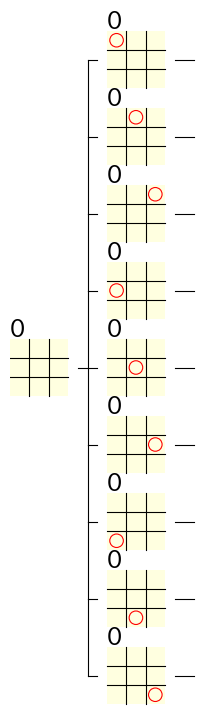

In [2]:
mbtree.draw_subtree(centernode=mbtree.root, maxdepth=1)

In [3]:
from tree import Mbtree, Node

def __init__(self, algo="bf", shortest_victory=False, subtree=False):
    if subtree:
        self.create_subtree()
        return
    
    self.algo = algo
    self.shortest_victory = shortest_victory
    Node.count = 0
    self.root = Node(Marubatsu())
    if self.algo == "bf":  
        self.create_tree_by_bf()
        self.calc_score_by_bf()
    else:
        self.nodelist = [self.root]
        self.nodelist_by_depth = [[] for _ in range(10)]
        self.nodelist_by_depth[0].append(self.root)
        self.nodenum = 0
        self.create_tree_by_df(self.root)
        self.nodelist_by_score = []
        self.calc_score_by_df(self.root)
    self.nodelist_by_mb = {}
    self.bestmoves_by_mb = {}
    self.calc_bestmoves(self.root)
    
Mbtree.__init__ = __init__

In [4]:
from marubatsu import Marubatsu

def create_subtree(self):
    self.root = Node(Marubatsu())
    self.root.calc_children()

Mbtree.create_subtree = create_subtree

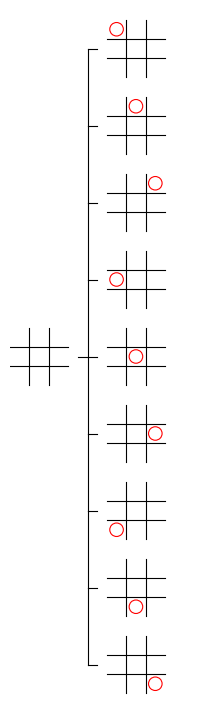

In [5]:
subtree = Mbtree(subtree=True)
subtree.draw_subtree(centernode=subtree.root, maxdepth=1)

In [6]:
def __init__(self, algo="bf", shortest_victory=False, subtree=None):
    if subtree is not None:
        self.subtree = subtree
        self.create_subtree()
        return
    
    self.algo = algo
    self.shortest_victory = shortest_victory
    Node.count = 0
    self.root = Node(Marubatsu())
    if self.algo == "bf":  
        self.create_tree_by_bf()
        self.calc_score_by_bf()
    else:
        self.nodelist = [self.root]
        self.nodelist_by_depth = [[] for _ in range(10)]
        self.nodelist_by_depth[0].append(self.root)
        self.nodenum = 0
        self.create_tree_by_df(self.root)
        self.nodelist_by_score = []
        self.calc_score_by_df(self.root)
    self.nodelist_by_mb = {}
    self.bestmoves_by_mb = {}
    self.calc_bestmoves(self.root)
    
Mbtree.__init__ = __init__

In [7]:
def create_subtree(self):
    self.root = Node(Marubatsu())
    
    depth = 0
    nodelist = [self.root]
    maxdepth = self.subtree["maxdepth"]
    while len(nodelist) > 0 and depth < maxdepth:
        childnodelist = []
        for node in nodelist:
            node.calc_children()
            childnodelist += node.children
        nodelist = childnodelist
        depth += 1

Mbtree.create_subtree = create_subtree

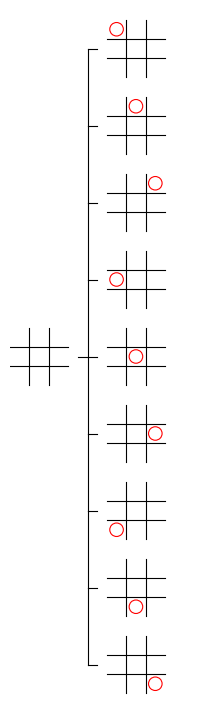

In [8]:
subtree = Mbtree(subtree={"maxdepth": 1})
subtree.draw_subtree(centernode=subtree.root, maxdepth=1)

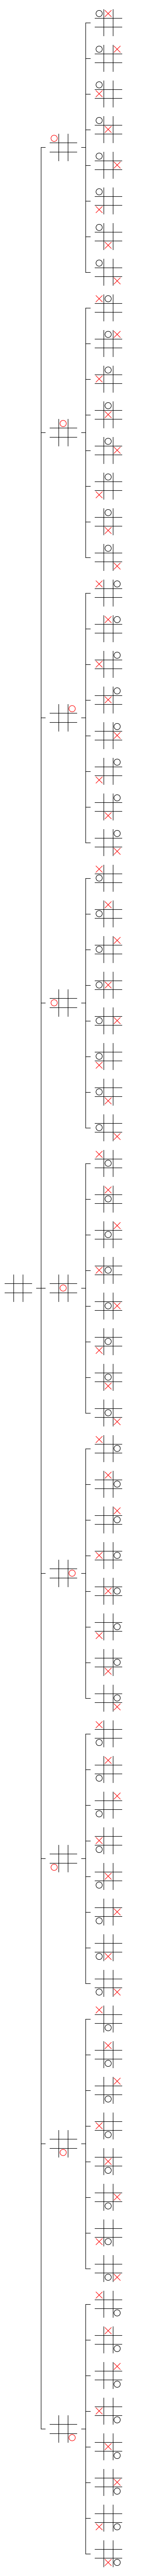

In [9]:
subtree = Mbtree(subtree={"maxdepth": 2})
subtree.draw_subtree(centernode=subtree.root, maxdepth=2)

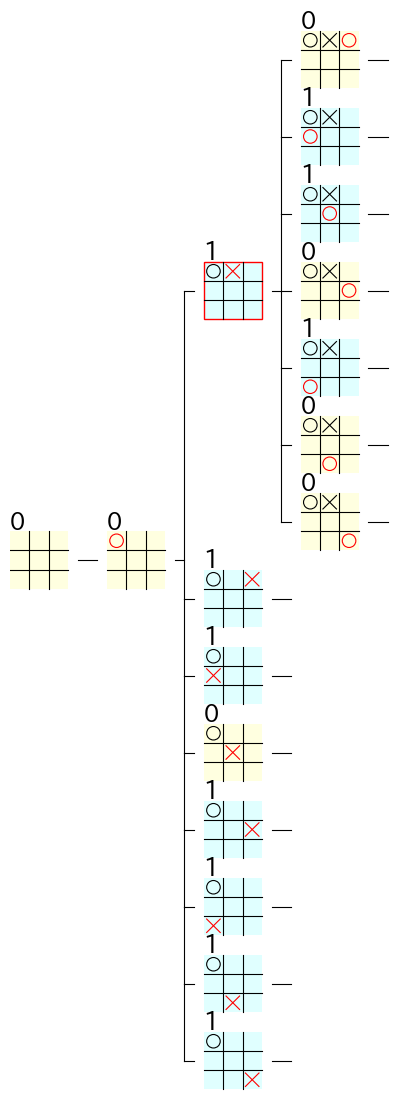

In [10]:
centernode = mbtree.nodelist_by_depth[2][0]
maxdepth = 3
mbtree.draw_subtree(centernode=centernode, selectednode=centernode, maxdepth=maxdepth)

In [11]:
from copy import deepcopy

def create_subtree(self):
    self.root = Node(Marubatsu())
    
    depth = 0
    nodelist = [self.root]
    centermb = self.subtree["centermb"]
    centerdepth = centermb.move_count
    records = centermb.records
    maxdepth = self.subtree["maxdepth"]
    while len(nodelist) > 0 and depth < maxdepth:
        childnodelist = []
        for node in nodelist:
            if depth <= centerdepth - 2:
                childmb = deepcopy(node.mb)
                x, y = records[depth + 1]
                childmb.move(x, y)
                childnode = Node(childmb, parent=node, depth=depth+1)   
                node.insert(childnode)
                childnodelist.append(childnode)
            else:
                node.calc_children()
                if depth == centerdepth - 1:
                    self.centernode = node.children_by_move[records[depth + 1]]
                    childnodelist.append(self.centernode)
                else:
                    childnodelist += node.children
        nodelist = childnodelist
        depth += 1

Mbtree.create_subtree = create_subtree

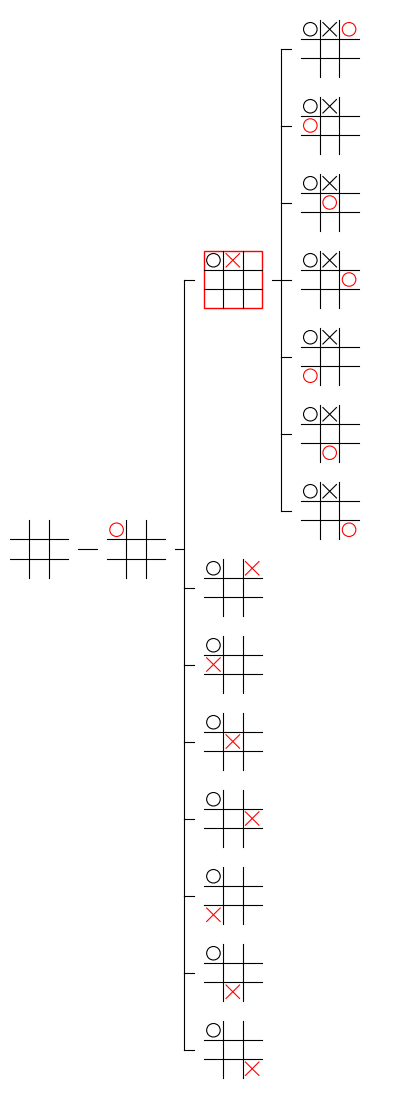

In [12]:
mb = Marubatsu()
mb.move(0, 0)
mb.move(1, 0)
maxdepth = 3
subtree = Mbtree(subtree={"centermb": mb, "maxdepth": 3})
centernode = subtree.centernode
subtree.draw_subtree(centernode=centernode, selectednode=centernode, maxdepth=maxdepth)

In [13]:
def create_subtree(self):
    self.root = Node(Marubatsu())
    
    depth = 0
    nodelist = [self.root]
    centermb = self.subtree["centermb"]
    centerdepth = centermb.move_count
    records = centermb.records
    maxdepth = self.subtree["maxdepth"]
    while len(nodelist) > 0 and depth < maxdepth:
        childnodelist = []
        for node in nodelist:
            if depth < centerdepth - 1:
                childmb = deepcopy(node.mb)
                x, y = records[depth + 1]
                childmb.move(x, y)
                childnode = Node(childmb, parent=node, depth=depth+1)   
                node.insert(childnode)
                childnodelist.append(childnode)
            else:
                node.calc_children()                   
                if depth == centerdepth - 1:
                    for move, childnode in node.children_by_move.items():
                        if move == records[depth + 1]:
                            self.centernode = childnode
                            childnodelist.append(self.centernode)
                        else:
                            if childnode.mb.status == Marubatsu.PLAYING:
                                # draw_subtree でこの部分木を表示する際に、中心となるノードの
                                # 兄弟ノードの右に子ノードが存在することを表す線を描画したい
                                # その線は Node クラスの draw_node で children 属性に 1 つ以上の
                                # 要素が存在する場合に描画されるので None を要素として追加する
                                childnode.children.append(None)
                else:
                    childnodelist += node.children
        nodelist = childnodelist
        depth += 1

Mbtree.create_subtree = create_subtree

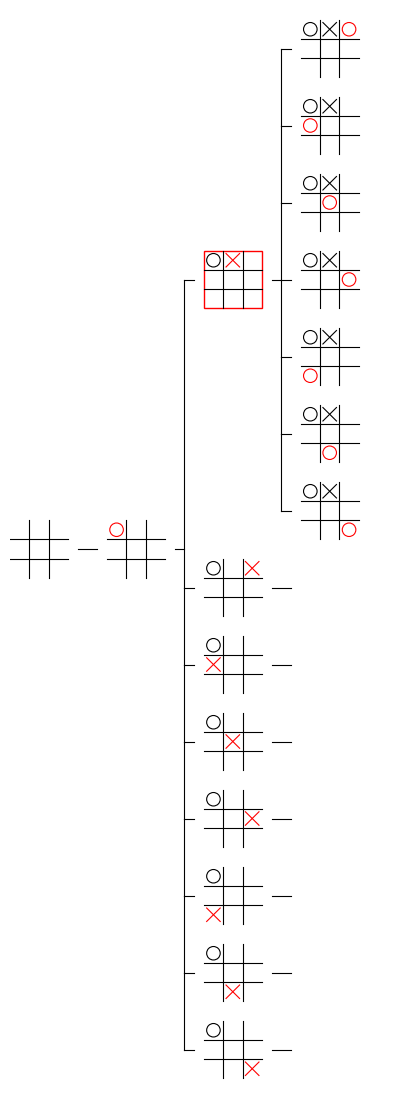

In [14]:
mb = Marubatsu()
mb.move(0, 0)
mb.move(1, 0)
maxdepth = 3
subtree = Mbtree(subtree={"centermb": mb, "maxdepth": 3})
centernode = subtree.centernode
subtree.draw_subtree(centernode=centernode, selectednode=centernode, maxdepth=maxdepth)